In [44]:
import os
import json
from collections import defaultdict, Counter
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_aug_p = '/root/data_alfred/json_data_augmentation_20200820'
data_p = '/root/data_alfred/json_feat_2.1.0_backup_20200826_agent_training'
splits_p = '/root/data_alfred/splits'

## Subgoal counts in Original

In [26]:
splits_p = '/root/data_alfred/splits'

with open(os.path.join(splits_p, 'oct21.json'), 'r') as f:
    splits_oct21 = json.load(f)

train_split_oct21 = splits_oct21['train']
print(len(train_split_oct21))
train_split_oct21[:10]

21023


[{'repeat_idx': 0,
  'task': 'pick_cool_then_place_in_recep-LettuceSliced-None-DiningTable-17/trial_T20190909_070538_437648'},
 {'repeat_idx': 1,
  'task': 'pick_cool_then_place_in_recep-LettuceSliced-None-DiningTable-17/trial_T20190909_070538_437648'},
 {'repeat_idx': 2,
  'task': 'pick_cool_then_place_in_recep-LettuceSliced-None-DiningTable-17/trial_T20190909_070538_437648'},
 {'repeat_idx': 0,
  'task': 'pick_two_obj_and_place-Candle-None-Cabinet-414/trial_T20190908_190650_163902'},
 {'repeat_idx': 1,
  'task': 'pick_two_obj_and_place-Candle-None-Cabinet-414/trial_T20190908_190650_163902'},
 {'repeat_idx': 2,
  'task': 'pick_two_obj_and_place-Candle-None-Cabinet-414/trial_T20190908_190650_163902'},
 {'repeat_idx': 0,
  'task': 'pick_heat_then_place_in_recep-Egg-None-SinkBasin-20/trial_T20190908_205050_000947'},
 {'repeat_idx': 1,
  'task': 'pick_heat_then_place_in_recep-Egg-None-SinkBasin-20/trial_T20190908_205050_000947'},
 {'repeat_idx': 2,
  'task': 'pick_heat_then_place_in_recep

In [27]:
scenes_original = []
for task in train_split_oct21:
    scenes_original.append(task['task'].split('/')[0].split('-')[-1])
Counter(scenes_original).most_common()

[('1', 548),
 ('21', 542),
 ('18', 481),
 ('20', 476),
 ('15', 456),
 ('4', 451),
 ('24', 432),
 ('23', 430),
 ('11', 426),
 ('16', 423),
 ('30', 421),
 ('19', 421),
 ('27', 418),
 ('17', 411),
 ('13', 411),
 ('7', 406),
 ('26', 399),
 ('5', 389),
 ('25', 383),
 ('6', 374),
 ('3', 367),
 ('14', 360),
 ('28', 359),
 ('2', 357),
 ('12', 342),
 ('22', 297),
 ('8', 276),
 ('214', 185),
 ('427', 165),
 ('218', 163),
 ('224', 163),
 ('305', 162),
 ('303', 159),
 ('203', 156),
 ('307', 150),
 ('212', 150),
 ('311', 150),
 ('318', 149),
 ('217', 145),
 ('316', 145),
 ('225', 144),
 ('420', 144),
 ('223', 142),
 ('328', 140),
 ('317', 139),
 ('417', 138),
 ('204', 137),
 ('430', 136),
 ('324', 135),
 ('230', 135),
 ('403', 134),
 ('201', 133),
 ('304', 131),
 ('423', 131),
 ('326', 129),
 ('327', 129),
 ('413', 129),
 ('314', 128),
 ('205', 128),
 ('323', 127),
 ('313', 127),
 ('310', 126),
 ('222', 126),
 ('309', 126),
 ('426', 123),
 ('228', 123),
 ('402', 122),
 ('302', 120),
 ('229', 120),


In [27]:
ct_subgoals = defaultdict(int)

for task in train_split_oct21:
    json_path = os.path.join(data_p, task['task'], 'pp', 'ann_{}.json'.format(task['repeat_idx']))
    with open(json_path, 'r') as f:
        traj_data = json.load(f)
    
    for a in traj_data['plan']['high_pddl']:
        ct_subgoals[a['discrete_action']['action']] += 1

In [28]:
ct_subgoals

defaultdict(int,
            {'GotoLocation': 67896,
             'PickupObject': 30848,
             'SliceObject': 3068,
             'PutObject': 28485,
             'CoolObject': 2950,
             'NoOp': 21023,
             'HeatObject': 2943,
             'CleanObject': 2842,
             'ToggleObject': 2251})

## Subgoal counts in New Partial Trajectories

In [24]:
splits_p = '/root/data_alfred/splits'

with open(os.path.join(splits_p, 'data_augmentation_experiment1_20200826.json'), 'r') as f:
    splits_aug = json.load(f)

    
train_split_aug = splits_aug['augmentation']
print(len(train_split_aug))
train_split_aug[:10]

7570


[{'task': 'look_at_obj_in_light-BaseballBat-None-DeskLamp-301/trial_T20200814_164125_595727',
  'repeat_idx': 0,
  'full_traj_success': False,
  'collected_subgoals': 2},
 {'task': 'look_at_obj_in_light-BaseballBat-None-DeskLamp-324/trial_T20200814_164653_293251',
  'repeat_idx': 0,
  'full_traj_success': True,
  'collected_subgoals': 5},
 {'task': 'look_at_obj_in_light-BasketBall-None-DeskLamp-319/trial_T20200814_165040_882757',
  'repeat_idx': 0,
  'full_traj_success': True,
  'collected_subgoals': 5},
 {'task': 'look_at_obj_in_light-BasketBall-None-DeskLamp-327/trial_T20200814_165217_576013',
  'repeat_idx': 0,
  'full_traj_success': True,
  'collected_subgoals': 5},
 {'task': 'look_at_obj_in_light-Book-None-DeskLamp-301/trial_T20200814_165504_049184',
  'repeat_idx': 0,
  'full_traj_success': False,
  'collected_subgoals': 2},
 {'task': 'look_at_obj_in_light-Book-None-DeskLamp-327/trial_T20200814_170059_770461',
  'repeat_idx': 0,
  'full_traj_success': True,
  'collected_subgoals'

In [25]:
scenes_partial = []
for task in train_split_aug:
    scenes_partial.append(task['task'].split('/')[0].split('-')[-1])
Counter(scenes_partial).most_common()

[('28', 389),
 ('3', 276),
 ('8', 255),
 ('21', 228),
 ('24', 226),
 ('27', 217),
 ('9', 205),
 ('4', 202),
 ('23', 201),
 ('18', 200),
 ('6', 195),
 ('11', 193),
 ('20', 191),
 ('19', 189),
 ('22', 178),
 ('15', 177),
 ('14', 176),
 ('26', 163),
 ('17', 161),
 ('7', 161),
 ('25', 151),
 ('2', 147),
 ('16', 141),
 ('29', 135),
 ('30', 117),
 ('5', 116),
 ('1', 113),
 ('10', 106),
 ('13', 99),
 ('301', 77),
 ('12', 76),
 ('203', 59),
 ('318', 58),
 ('205', 53),
 ('303', 51),
 ('201', 48),
 ('209', 48),
 ('316', 47),
 ('317', 46),
 ('230', 45),
 ('229', 43),
 ('305', 43),
 ('206', 35),
 ('211', 35),
 ('304', 34),
 ('310', 34),
 ('213', 33),
 ('215', 33),
 ('220', 33),
 ('227', 32),
 ('219', 32),
 ('224', 30),
 ('210', 30),
 ('225', 29),
 ('329', 29),
 ('217', 28),
 ('218', 28),
 ('228', 28),
 ('208', 28),
 ('214', 27),
 ('222', 27),
 ('313', 27),
 ('414', 27),
 ('323', 26),
 ('314', 26),
 ('402', 26),
 ('204', 25),
 ('207', 25),
 ('223', 24),
 ('302', 24),
 ('307', 24),
 ('216', 23),
 ('

In [36]:
ct_subgoals = defaultdict(int)

for task in train_split_aug:
    
    if 'full_traj_success' in task.keys():
        data_dir = data_aug_p
        pp_folder = 'pp_explainer'
    else:
        data_dir = data_p
        pp_folder = 'pp'
    
    json_path = os.path.join(data_dir, task['task'], pp_folder, 'ann_{}.json'.format(task['repeat_idx']))
    with open(json_path, 'r') as f:
        traj_data = json.load(f)
    
    for a in traj_data['plan']['high_pddl']:
        ct_subgoals[a['discrete_action']['action']] += 1

In [37]:
ct_subgoals

defaultdict(int,
            {'GotoLocation': 17452,
             'PickupObject': 9828,
             'NoOp': 7570,
             'ToggleObject': 71,
             'PutObject': 3029,
             'SliceObject': 669,
             'CleanObject': 209,
             'CoolObject': 187,
             'HeatObject': 89})

## Subgoal counts in New 12K Full Trajectories

In [22]:
splits_p = '/root/data_alfred/splits/unlabeled_12k_20201206.json'

with open(splits_p, 'r') as f:
    splits_aug = json.load(f)

train_split_aug = splits_aug['augmentation']
print(len(train_split_aug))
train_split_aug[:10]

11947


[{'task': 'pick_and_place_simple-CellPhone-None-Sofa-224/trial_T20190912_062415_255725',
  'repeat_idx': 0,
  'full_traj_success': True,
  'collected_subgoals': 5},
 {'task': 'pick_heat_then_place_in_recep-Tomato-None-DiningTable-19/trial_T20190911_051611_152502',
  'repeat_idx': 0,
  'full_traj_success': True,
  'collected_subgoals': 7},
 {'task': 'pick_cool_then_place_in_recep-Tomato-None-Microwave-20/trial_T20190911_220048_789694',
  'repeat_idx': 0,
  'full_traj_success': True,
  'collected_subgoals': 7},
 {'task': 'pick_and_place_simple-CellPhone-None-Dresser-314/trial_T20190910_153622_489437',
  'repeat_idx': 0,
  'full_traj_success': True,
  'collected_subgoals': 4},
 {'task': 'pick_and_place_simple-CreditCard-None-SideTable-313/trial_T20190913_140646_900196',
  'repeat_idx': 0,
  'full_traj_success': True,
  'collected_subgoals': 4},
 {'task': 'pick_cool_then_place_in_recep-AppleSliced-None-SinkBasin-7/trial_T20190910_135634_526097',
  'repeat_idx': 0,
  'full_traj_success': Tr

In [23]:
scenes_new12k = []
for task in train_split_aug:
    scenes_new12k.append(task['task'].split('/')[0].split('-')[-1])
Counter(scenes_new12k).most_common()

[('16', 332),
 ('17', 302),
 ('7', 293),
 ('11', 287),
 ('20', 280),
 ('26', 280),
 ('15', 261),
 ('13', 260),
 ('27', 259),
 ('19', 255),
 ('18', 253),
 ('23', 249),
 ('1', 247),
 ('5', 243),
 ('24', 237),
 ('4', 230),
 ('21', 223),
 ('25', 214),
 ('2', 212),
 ('30', 204),
 ('12', 177),
 ('14', 166),
 ('6', 159),
 ('3', 144),
 ('28', 121),
 ('403', 114),
 ('406', 111),
 ('201', 108),
 ('204', 108),
 ('413', 105),
 ('301', 105),
 ('311', 104),
 ('323', 104),
 ('430', 102),
 ('415', 102),
 ('411', 102),
 ('209', 102),
 ('401', 102),
 ('229', 102),
 ('8', 102),
 ('326', 102),
 ('313', 99),
 ('228', 96),
 ('213', 96),
 ('408', 93),
 ('426', 93),
 ('203', 93),
 ('427', 93),
 ('402', 92),
 ('407', 92),
 ('221', 90),
 ('305', 90),
 ('414', 90),
 ('220', 90),
 ('422', 90),
 ('230', 90),
 ('211', 90),
 ('418', 87),
 ('307', 87),
 ('216', 87),
 ('316', 86),
 ('210', 84),
 ('405', 84),
 ('22', 84),
 ('212', 81),
 ('410', 78),
 ('202', 78),
 ('227', 78),
 ('214', 77),
 ('314', 75),
 ('423', 75),


In [5]:
data_aug_p = '/root/data_alfred/unlabeled_12k_20201206/seen'

ct_subgoals = defaultdict(int)

for task in train_split_aug:
    
    if 'full_traj_success' in task.keys():
        data_dir = data_aug_p
        pp_folder = 'pp_explainer'
    else:
        data_dir = data_p
        pp_folder = 'pp'
    
    json_path = os.path.join(data_dir, task['task'], pp_folder, 'ann_{}.json'.format(task['repeat_idx']))
    with open(json_path, 'r') as f:
        traj_data = json.load(f)
    
    for a in traj_data['plan']['high_pddl']:
        ct_subgoals[a['discrete_action']['action']] += 1

In [6]:
ct_subgoals

defaultdict(int,
            {'GotoLocation': 38882,
             'PickupObject': 17063,
             'PutObject': 16674,
             'NoOp': 11947,
             'HeatObject': 1727,
             'CoolObject': 1677,
             'SliceObject': 1774,
             'CleanObject': 2081,
             'ToggleObject': 378})

## Compare distribution by scene number

In [ ]:
scenes_new12k
scenes_partial
scenes_original

In [32]:
scenes = set(scenes_new12k) | set(scenes_partial) |  set(scenes_original)
len(scenes)

120

In [39]:
scene_ordered_by_original_counts = list(Counter(scenes_original).most_common())
scene_ordered_by_original_counts = [x for x,y in scene_ordered_by_original_counts]

In [42]:
Counter(scenes_partial)['301']

77

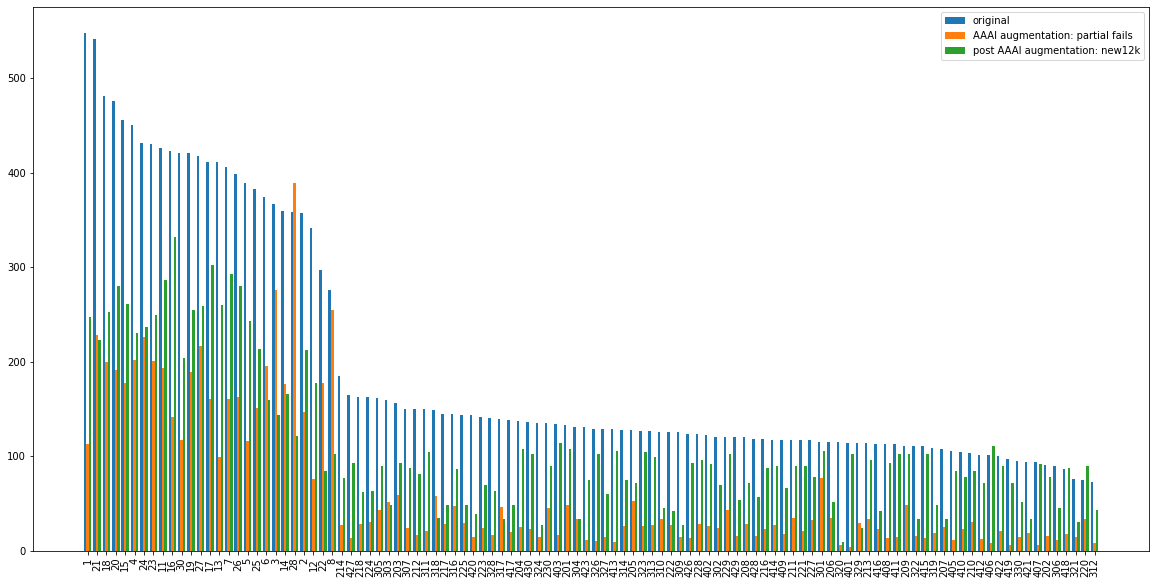

In [54]:
scenes = scene_ordered_by_original_counts
ct_original = [Counter(scenes_original)[s] for s in scenes]
ct_partial = [Counter(scenes_partial)[s] for s in scenes]
ct_new12k = [Counter(scenes_new12k)[s] for s in scenes]

def subcategorybar(scenes, vals, legends, width=0.8):
    n = len(vals)
    _scenes = np.arange(len(scenes))
    plt.figure(figsize=(20,10))
    for i in range(n):
        plt.bar(_scenes - width/2. + i/float(n)*width, vals[i], 
                width=width/float(n), align="edge", label=legends[i])
    plt.xticks(rotation=90)
    plt.xticks(_scenes, scenes)
    plt.legend()
    
subcategorybar(scenes, [ct_original,ct_partial,ct_new12k], ['original', 'AAAI augmentation: partial fails', 'post AAAI augmentation: new12k'])

plt.show()